In [1]:
from glob import glob
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_file_path=glob('data/*.bdf')
print(len(all_file_path))

1


In [3]:
files =[i for i in all_file_path]
print(files)

['data\\s01.bdf']


In [4]:
def read_data(file_path):
    data=mne.io.read_raw_bdf(file_path,preload=True)
    #creating a montage to specify electrode locations.
    montage = mne.channels.make_standard_montage('standard_1005')
    data.set_montage(montage,on_missing='ignore')
    channels_to_remove = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
    data.drop_channels(channels_to_remove)
    data.plot()
    epochs=mne.make_fixed_length_epochs(data,duration=5,overlap=1)
    array=epochs.get_data()
    return array.astype(np.float32),data
    

Extracting EDF parameters from D:\Internship\internship documents\data\s01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...
Using matplotlib as 2D backend.


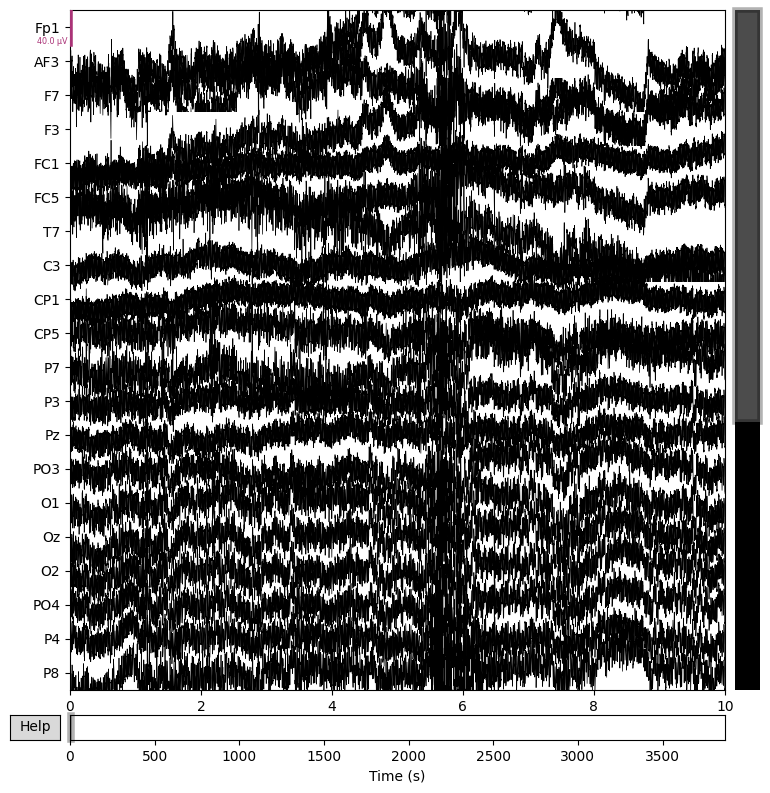

Not setting metadata
967 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 967 events and 2560 original time points ...
0 bad epochs dropped


In [7]:
sample_data,data = read_data(files[0])

In [8]:
duration = data.times[-1] - data.times[0]
print(duration)

3868.998046875


In [9]:
ica = mne.preprocessing.ICA(n_components=20,random_state=0)

#ica is method to remove artifacts. artifacts are unwanated signals,eg eye blink, muscle movement, and many. 

In [10]:
ica.fit(data.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 845 samples (1.650 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    2.0s finished


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 51.6s.


Method,fastica
Fit,46 iterations on raw data (1980928 samples)
ICA components,20
Available PCA components,32
Channel types,eeg
ICA components marked for exclusion,—


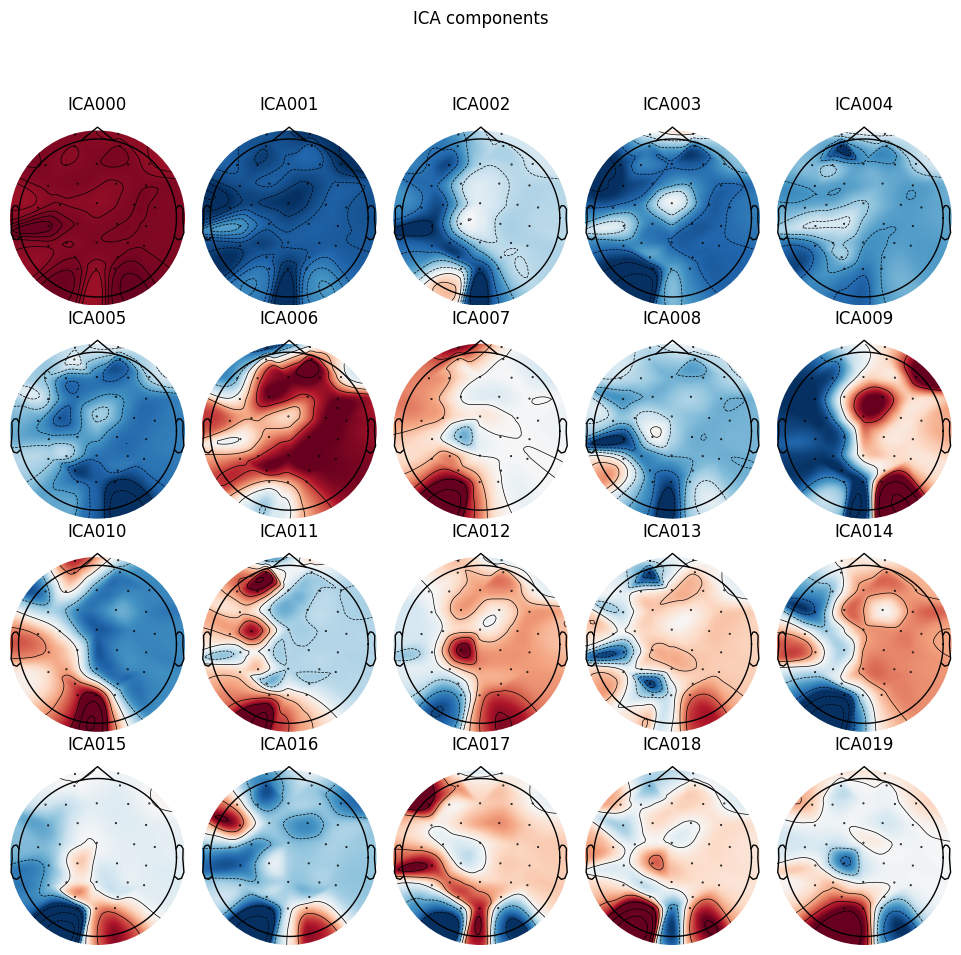

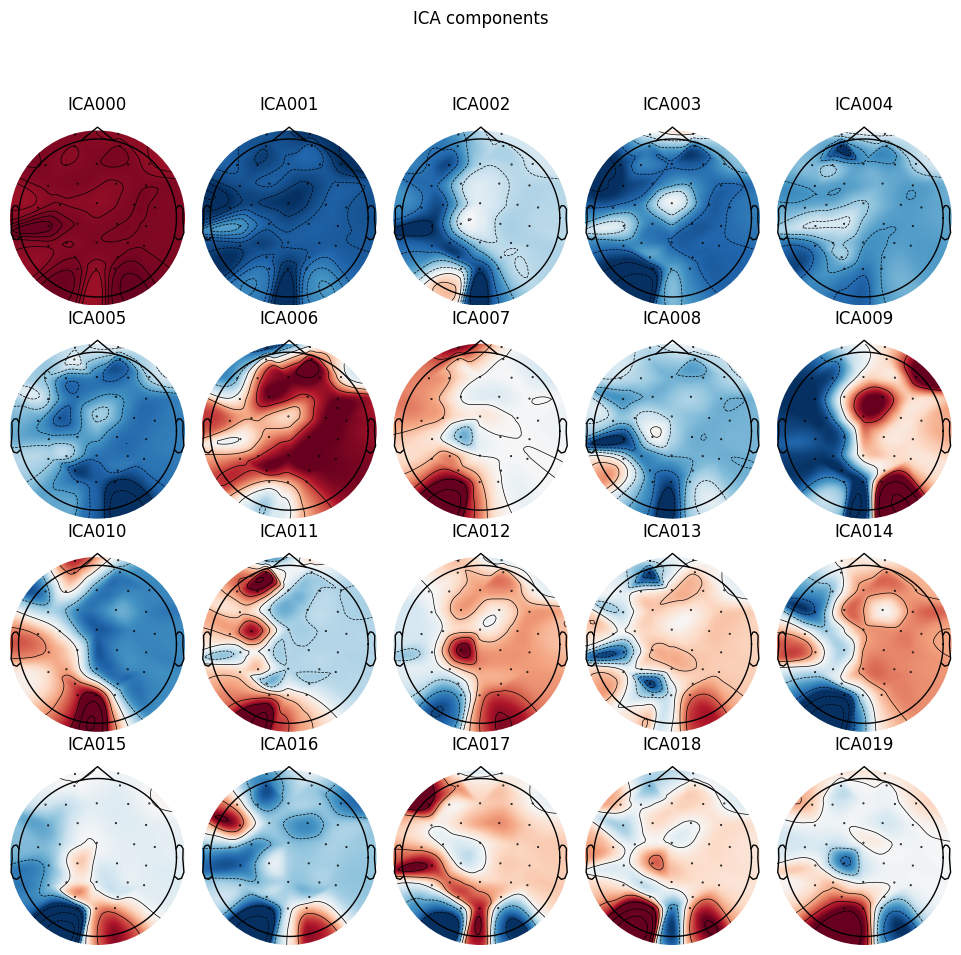

In [11]:
ica.plot_components(outlines='head')


In [12]:
#sample_data.shape #epoches, channel, length of signal

Epochs:
we find events to divide the signal into different parts

In [13]:
event_id = 1  # Assign a specific event ID to each epoch
event_duration = 60  # Duration of each epoch in seconds
events = mne.make_fixed_length_events(data, event_id, duration=event_duration)

# Define the desired epoch parameters
tmin = 0  # Start time of each epoch (in seconds)
tmax = event_duration  # End time of each epoch (in seconds)

# Create epochs using the defined parameters
epochs = mne.Epochs(data, events, event_id, tmin, tmax, baseline=None, preload=True)


Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 64 events and 30721 original time points ...
0 bad epochs dropped


In [14]:
events

array([[      0,       0,       1],
       [  30720,       0,       1],
       [  61440,       0,       1],
       [  92160,       0,       1],
       [ 122880,       0,       1],
       [ 153600,       0,       1],
       [ 184320,       0,       1],
       [ 215040,       0,       1],
       [ 245760,       0,       1],
       [ 276480,       0,       1],
       [ 307200,       0,       1],
       [ 337920,       0,       1],
       [ 368640,       0,       1],
       [ 399360,       0,       1],
       [ 430080,       0,       1],
       [ 460800,       0,       1],
       [ 491520,       0,       1],
       [ 522240,       0,       1],
       [ 552960,       0,       1],
       [ 583680,       0,       1],
       [ 614400,       0,       1],
       [ 645120,       0,       1],
       [ 675840,       0,       1],
       [ 706560,       0,       1],
       [ 737280,       0,       1],
       [ 768000,       0,       1],
       [ 798720,       0,       1],
       [ 829440,       0,   

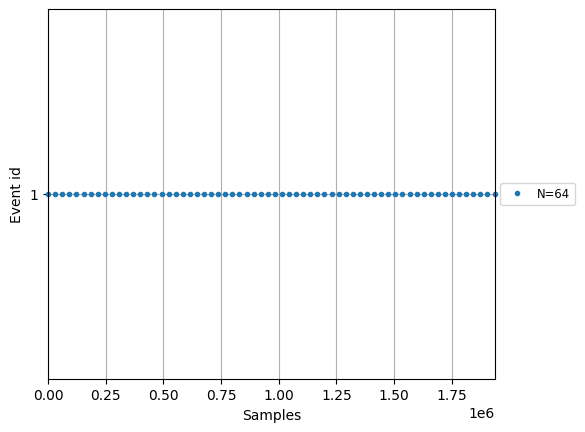

In [15]:
mne.viz.plot_events(events[:100]);

In [16]:
event_ids ={"standard/stimulus":1}
epochs =mne.Epochs(data,events,event_id=event_ids)

Not setting metadata
64 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Using data from preloaded Raw for 64 events and 359 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 20 events and 359 original time points ...


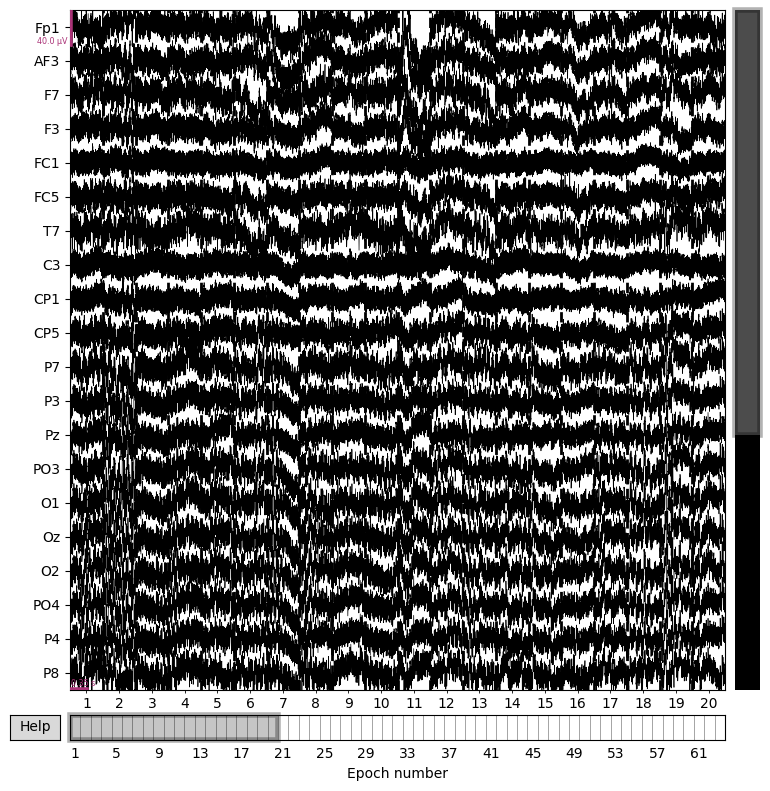

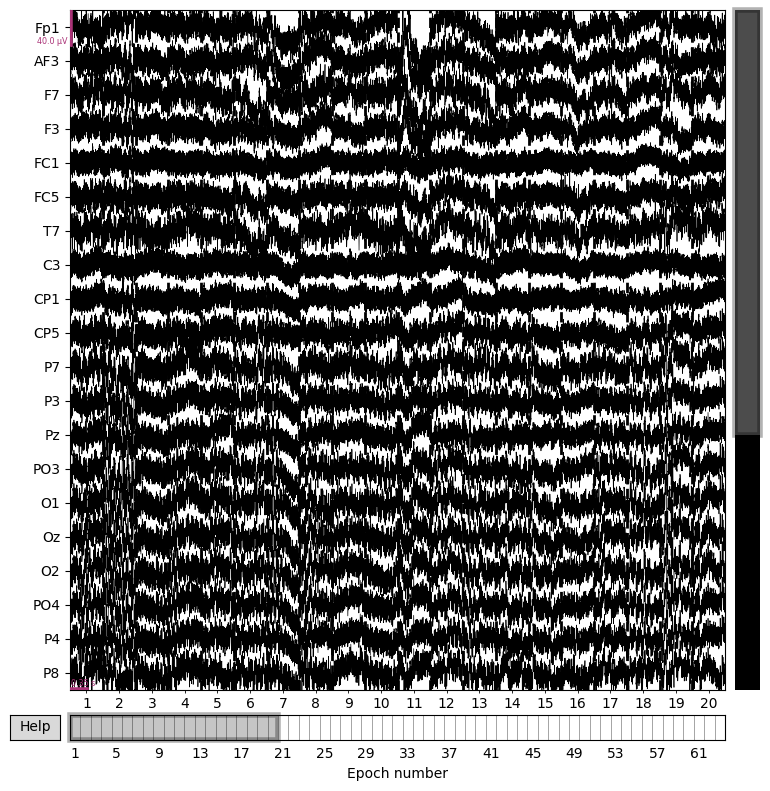

In [17]:
epochs.plot()

In [18]:
epochs.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2010-07-01 10:00:16 UTC
 nchan: 33
 projs: []
 sfreq: 512.0 Hz
>

Using data from preloaded Raw for 63 events and 359 original time points ...
Not setting metadata
63 matching events found
No baseline correction applied
0 projection items activated


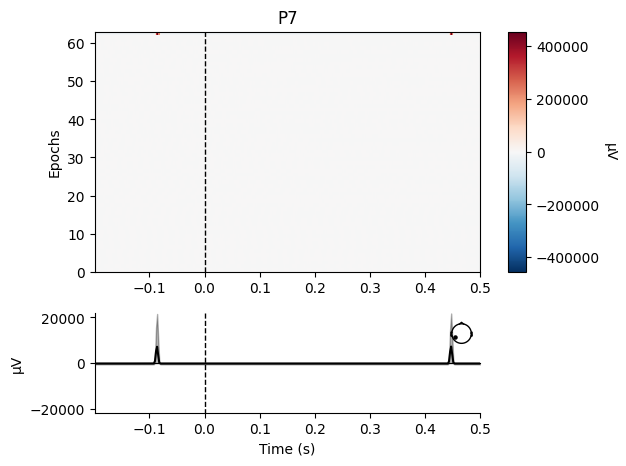

In [34]:
#visualising one channel
epochs["standard"].plot_image(picks=[10]);

The epochs.equalize_event_counts(event_ids) function allows you to balance the number of epochs across different event categories by randomly selecting epochs from each category to match the event category with the fewest epochs.

-0.1 is 1 milisecond

In [38]:
epochs.equalize_event_counts(event_ids)

Dropped 0 epochs: 


(<Epochs |  63 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~43 kB, data not loaded,
  'standard/stimulus': 63>,
 array([], dtype=int64))

In [39]:
epochs.save("epochs-epo.fif")

Using data from preloaded Raw for 1 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...


In [48]:
import scipy.stats
feature_names = ['mean', 'variance', 'skewness', 'kurtosis', 'total_power', 'delta_power', 'theta_power']

# Initialize an empty array to store the extracted features
num_epochs = len(epochs)
num_channels = len(epochs.info['ch_names'])
num_features = len(feature_names)
features = np.zeros((num_epochs, num_channels, num_features))

# Loop through each epoch and extract the features
for i, epoch in enumerate(epochs):
    for j, ch_name in enumerate(epochs.info['ch_names']):
        epoch_data = epochs.get_data()[j]  # EEG data for the current channel
        features[i, j, 0] = np.mean(epoch_data)  # Mean
        features[i, j, 1] = np.var(epoch_data)  # Variance
        features[i, j, 2] = np.nanmean(scipy.stats.skew(epoch_data))  # Skewness (handle NaN values)
        features[i, j, 3] = np.nanmean(scipy.stats.kurtosis(epoch_data))  # Kurtosis (handle NaN values)
        features[i, j, 4] = np.sum(np.square(np.abs(np.fft.fft(epoch_data))))  # Total power
        features[i, j, 5] = np.sum(np.square(np.abs(np.fft.fft(epoch_data)))[1:4])  # Delta power
        features[i, j, 6] = np.sum(np.square(np.abs(np.fft.fft(epoch_data)))[4:8])  # Theta power

# Print the extracted features for the first epoch and channel
print(features[0, 0, :])

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...
Using data from preloaded Raw for 63 events and 359 original time points ...

In [59]:
print(features.shape)

(63, 33, 7)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Prepare the features and target variables
X = features.reshape((-1, features.shape[-1]))  # Flatten the features
#y = target_labels  # Replace 'target_labels' with your actual target variable
print(X.shape)

(2079, 7)
